In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from boruta import BorutaPy
from joblib import dump, load
bitter_features = pd.read_csv('test.csv')

replaced_data_mean = bitter_features.iloc[:, 10:]

y = bitter_features['Sweet']

# Features
X = replaced_data_mean

In [4]:
X

,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,"torsions_((C,3,1),(C,3,1),(N,3,1),(N,3,0))","torsions_((C,4,0),(N,3,0),(O,2,0),(C,3,1))","torsions_((C,4,0),(C,4,0),(N,3,0),(O,2,0))","torsions_((C,4,0),(C,4,0),(C,4,0),(F,1,0))","torsions_((C,3,1),(N,3,0),(S,4,0),(O,2,0))","torsions_((C,3,1),(N,3,0),(N,3,1),(C,3,1))","torsions_((C,3,1),(O,2,0),(C,3,1),(O,2,0))","torsions_((C,4,0),(O,2,0),(C,3,1),(O,2,0))","torsions_((C,4,0),(C,3,1),(O,2,0),(C,3,1))","torsions_((C,4,0),(N,3,0),(S,4,0),(O,2,0))"
0,1.150349,-1.644854,1.318011,1.396713,1.396713,1.485165,-1.862732,-1.150349,-0.551560,0.654950,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,0.971599,-0.326891,0.971599,1.135299,0.808592,1.135299,-1.509191,0.984235,-2.153875,1.743479,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
2,0.971599,-0.326891,0.971599,1.135299,0.808592,1.135299,-1.509191,0.984235,-2.153875,1.743479,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,-1.959964,-1.091620,-2.080278,-1.281552,-1.959964,-1.213340,-2.497705,0.674490,-5.199338,2.241403,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
4,1.959964,-0.841621,1.959964,1.959964,1.959964,1.959964,-0.560703,-0.047017,-0.551560,0.229153,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2.497705,-1.485165,2.497705,2.497705,2.241403,2.241403,-0.819502,-0.645273,-0.506508,0.133561,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
157,0.551560,0.253347,0.402250,0.294010,0.368501,0.213099,-0.031338,0.141468,-0.007833,-0.062707,...,2.080278,2.080278,2.080278,2.080278,1.862732,2.080278,2.080278,2.080278,2.080278,2.080278
158,-1.263944,1.743479,-1.336916,-1.439531,-1.336916,-1.509191,1.909094,1.356312,1.780464,-1.120502,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
159,1.780464,-1.780464,1.862732,1.862732,1.862732,1.862732,-1.587056,-1.376231,-0.471197,0.070557,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


In [2]:
import pickle
file = open('features/sweet/sweet_boruta.p','rb')

boruta = pickle.load(file)

In [6]:
len(boruta)

470

In [10]:
X_transformed = X.reindex(columns=boruta).values

In [11]:
len(X_transformed)

161

In [12]:
file = open('final_model/mean.p','rb')
import pickle
best_model =pickle.load(file)

y_pred = best_model.predict(X_transformed)
y_pred_proba = best_model.predict_proba(X_transformed)[:, 1]
print("Bitter : ")
print(y_pred)
print(y_pred_proba)


Bitter : 
[False  True  True  True  True  True  True  True  True False False False
 False False False False  True False  True False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
  True  True False False False False False  True False False False False
 False  True  True False False False False  True False  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False False  True False  True False False False False False False
 False False False False False False False False False  True  True False
  True  True  True  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True False  True  True False]
[0.335023

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    precision_score, recall_score, f1_score, average_precision_score
)
import numpy as np

# Model evaluation
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)
aupr = average_precision_score(y, y_pred_proba)  # AUPR
sensitivity = recall  # Sensitivity (Sn) is the same as recall

# Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

# Calculate NER and Specificity
ner = fp / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero

# Print results
print("Accuracy:", accuracy)
print("Precision (P):", precision)
print("Recall (R):", recall)
print("Sensitivity (Sn):", sensitivity)
print("F1-score (F1):", f1)
print("ROC-AUC Score (AuROC):", roc_auc)
print("AUPR Score (AuPR):", aupr)
print("Non Error Rate (NER):", 1-ner)
print("Specificity (SP):", specificity)
print("Classification Report:\n", classification_report(y, y_pred))

Accuracy: 0.7204968944099379
Precision (P): 0.8987341772151899
Recall (R): 0.6574074074074074
Sensitivity (Sn): 0.6574074074074074
F1-score (F1): 0.7593582887700535
ROC-AUC Score (AuROC): 0.8134171907756813
AUPR Score (AuPR): 0.9123501328252975
Non Error Rate (NER): 0.8490566037735849
Specificity (SP): 0.8490566037735849
Classification Report:
               precision    recall  f1-score   support

       False       0.55      0.85      0.67        53
        True       0.90      0.66      0.76       108

    accuracy                           0.72       161
   macro avg       0.72      0.75      0.71       161
weighted avg       0.78      0.72      0.73       161



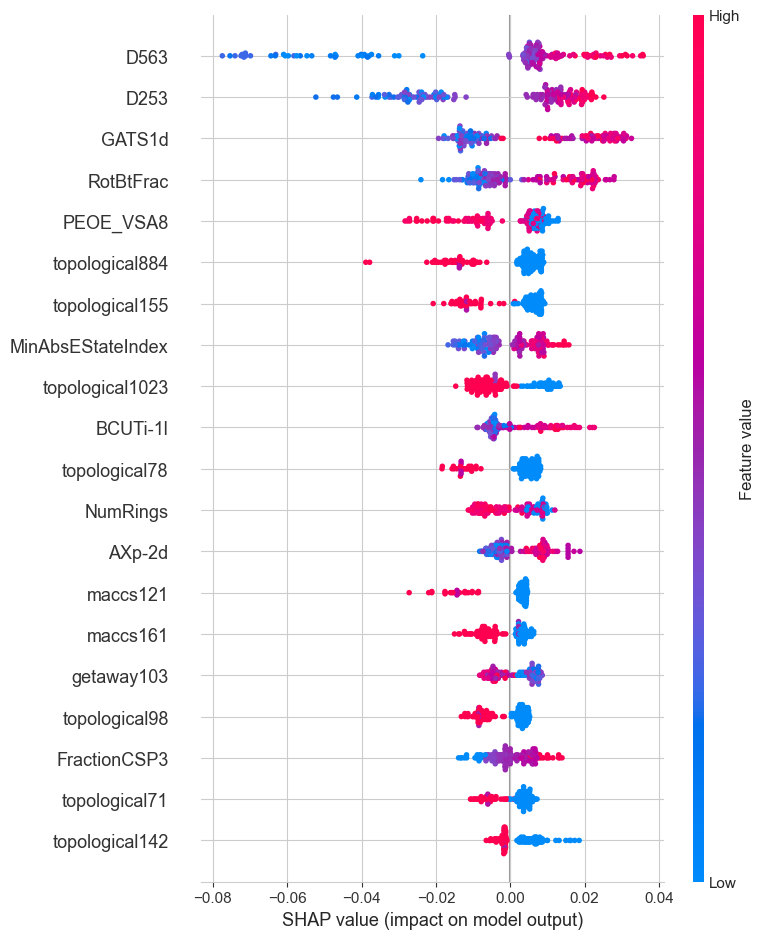

In [16]:
import shap

# Initialize the TreeExplainer for the best_model
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the test data
# For binary classifiers, shap_values is a list with two arrays: one for each class.
shap_values = explainer.shap_values(X_transformed)

# Plot SHAP summary for the positive class (index 1)
# Use the significant feature names for proper labeling in the plot.
shap.summary_plot(
    shap_values[1], 
    X_transformed, 
    feature_names=boruta, 
    plot_type="dot", 
    color_bar=True, 
    max_display=20  # Limit to top 20 features
)



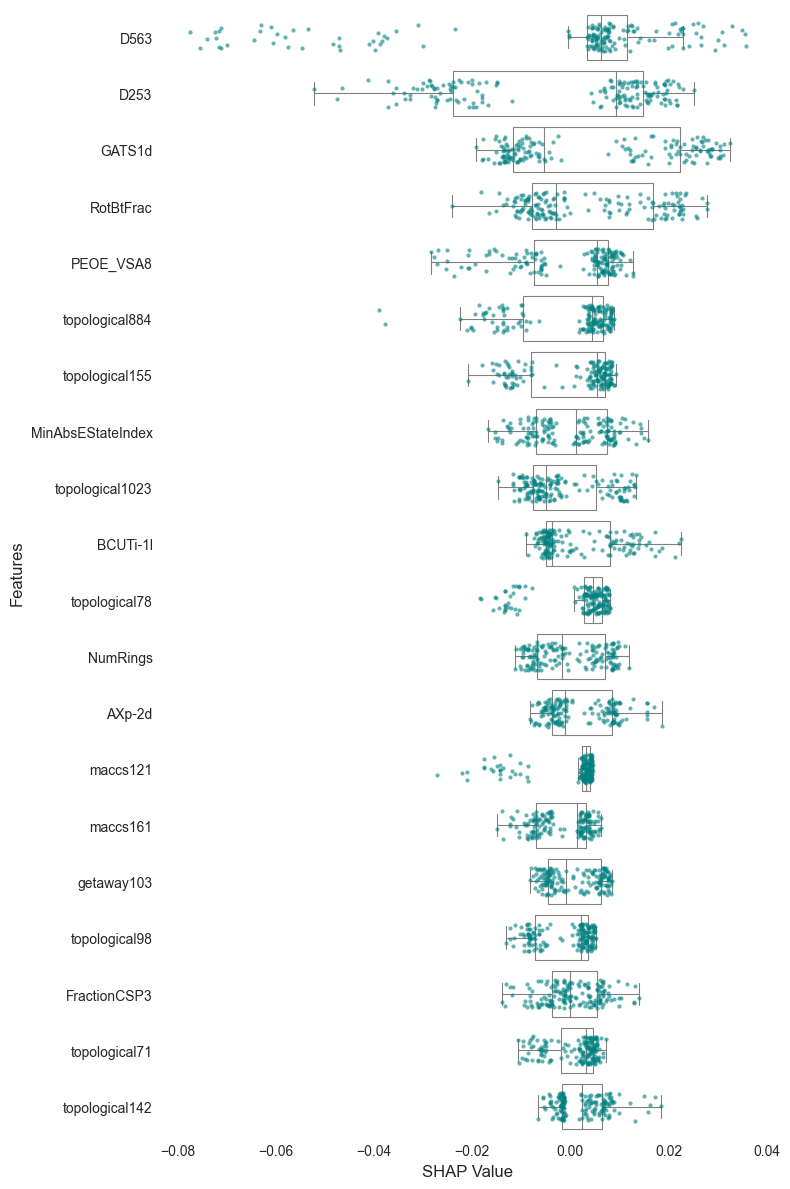

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# If shap_values is a list (common for classifiers), take the positive class
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_array = shap_values[1]
else:
    shap_array = shap_values

# Convert to DataFrame
shap_df = pd.DataFrame(shap_array, columns=boruta)

# Compute mean absolute SHAP values (importance)
feature_importance = shap_df.abs().mean().sort_values(ascending=False)
# Make sure 'shap_df_topN' and 'top_N_features' are defined
N = 20  # You can adjust this to show fewer/more features
top_N_features = feature_importance.index[:N]
shap_df_topN = shap_df[top_N_features]

# Resize figure to prevent congestion
plt.figure(figsize=(8, 0.5 * N + 2))  # Dynamic height based on N

sns.set_style("whitegrid")

# Draw boxplot
sns.boxplot(
    data=shap_df_topN,
    orient='h',
    color='white',
    showfliers=False,
    linewidth=0.8,
    boxprops=dict(edgecolor='gray'),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    medianprops=dict(color='gray')
)

# Draw stripplot
sns.stripplot(
    data=shap_df_topN,
    orient='h',
    color='teal',
    alpha=0.6,
    jitter=0.25,
    size=3
)

# Format
plt.xlabel("SHAP Value", fontsize=12)
# plt.xlabel("SHAP Value (Median Importance)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# plt.title(f"Top {N} Important Features (SHAP Analysis)", fontsize=14, weight='bold')
plt.grid(False)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
